In [80]:
# Author: Roshan Ram
# AndrewID: rram

import yfinance as yfinance

import module_manager
module_manager.review()

import yfinance as yf # to pull stock data with yf.download(name, yyyy-mm-dd of opening, yyyy-mm-dd of opening)

import numpy as np # used for everything lol
import pandas as pd # data mainpulation
import matplotlib.pyplot as plt # graphing/plotting

# %matplotlib inline 
#just to make stuff look nice

In [81]:
stock = None
while not isinstance(stock, str):
    stock = input("Enter your desired stock. Only alphanumeric characters please.")
openingInp = input("Enter your desired opening date. (yyyy-mm-dd)") #'2016-01-01'
closingInp = input("Enter your desired closing date. (yyyy-mm-dd)") # '2019-08-01'


data = yf.download(stock, openingInp, closingInp)

Enter your desired stock. Only alphanumeric characters please.AAPL
Enter your desired opening date. (yyyy-mm-dd)2016-01-01
Enter your desired closing date. (yyyy-mm-dd)2019-08-01
[*********************100%***********************]  1 of 1 completed


In [82]:
data.head() #let's see what the data looks like
# so we have the data, opening price, high val, low val, closing price, 
# adjusted close, and volume as parameters of our data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,98.446655,67649400
2016-01-05,105.750000,105.849998,102.410004,102.709999,95.979675,55791000
2016-01-06,100.559998,102.370003,99.870003,100.699997,94.101387,68457400
2016-01-07,98.680000,100.129997,96.430000,96.449997,90.129868,81094400
2016-01-08,98.550003,99.110001,96.760002,96.959999,90.606438,70798000


In [83]:
def showStock():
    plt.rcParams["figure.figsize"] = (20,10)
    data['Adj Close'].plot()
    plt.show()


In [84]:
# commodity channel index (CCI) algorithm
# mathematical calculation: https://www.investopedia.com/terms/c/commoditychannelindex.asp
# CCI = (Typical price – MA of Typical price) / (0.015 * Standard deviation of Typical price)
def calcCCI(data, numDays):
    movingAverageSum = 0
    typicalPrice = (data['Low'] + data['High'] + data['Close'])/3
#     for row in range(len(data['Low'])-30):
#         for i in range(30):
#             movingAverageSum += 
    top = typicalPrice - pd.Series(typicalPrice).rolling(window=numDays).mean()
    bottom = pd.Series(0.015 * pd.Series(typicalPrice).rolling(window=numDays).std())
    cci = pd.Series(top/bottom, name = 'CCI')
    data = data.join(cci)
    return data

In [85]:
calcCCI(data, 30).head()

,Open,High,Low,Close,Adj Close,Volume,CCI
Date,,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,98.446655,67649400,NaN
2016-01-05,105.750000,105.849998,102.410004,102.709999,95.979675,55791000,NaN
2016-01-06,100.559998,102.370003,99.870003,100.699997,94.101387,68457400,NaN
2016-01-07,98.680000,100.129997,96.430000,96.449997,90.129868,81094400,NaN
2016-01-08,98.550003,99.110001,96.760002,96.959999,90.606438,70798000,NaN


In [86]:
def showCCI(data, numDays):
    cci = calcCCI(data, numDays)['CCI']
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(2, 1, 1)
    ax.set_xticklabels([])
    plt.plot(data['Close'],lw=1)
    plt.title('NSE Price Chart')
    plt.ylabel('Close Price')
    plt.grid(True)
    bx = fig.add_subplot(2, 1, 2)
    plt.plot(cci,'k',lw=0.75,linestyle='-',label='CCI')
    plt.legend(loc=2,prop={'size':9.5})
    plt.ylabel('CCI values')
    plt.grid(True)
    plt.setp(plt.gca().get_xticklabels(), rotation=30)
    plt.show()
    

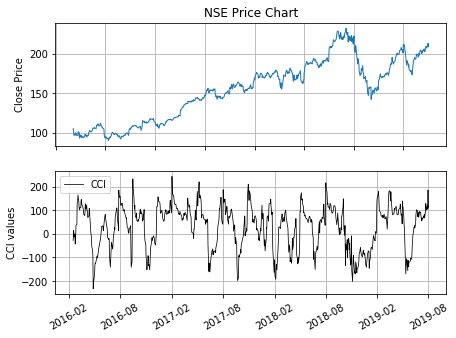

In [87]:
showCCI(data, 30)

In [88]:
def rollingAverage(data, numDays):
    total = [0]
    movingAverages = []
    for i, x in enumerate(data, 1):
        total.append(total[i-1] + x)
        if i >= numDays:
            currMovingAverage = (total[i] - total[i - numDays])/numDays
            movingAverages.append(currMovingAverage)
    
    return pd.Series(movingAverages)

In [89]:
#exponential calculation:
    # https://www.investopedia.com/ask/answers/122314/what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp
def calcMA(data, numDays, calcType):
    '''
    calculates the moving average
    data: the data you want to use
    numDays: number of days to perform the average over
    calcType: the type of average to be done--
    '''
    if calcType == 'simple':
        simple = pd.Series(pd.Series(data['Close']).rolling(window=numDays).mean(), name='SMA')
#         pd.Series(typicalPrice).rolling(window=numDays).mean()
        data = data.join(simple)
        return data
    elif calcType == 'exponential':
#         exp = pd.Series(pd.ewma(data['Close'], span = numDays, min_periods = numDays))
        exp = data.ewm(span = numDays, min_periods = numDays, adjust=False).mean() # todo this doesn't work, just rewrite real way
        
        data = data.join(exp)
        return data
    


In [90]:
# def stochasticK(close, low, high, n):  
#     STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
#     return STOK

# def stochasticD(close, low, high, n):
#     STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
#     STOD = pd.rolling_mean(STOK, 3)
#     return STOD
   
# df = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))
# df['High'] = get_high('FB', '1/1/2016', '12/31/2016')
# df['Low'] = get_low('FB', '1/1/2016', '12/31/2016')
# df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
# df['%D'] = STOD(df['Close'], df['Low'], df['High'], 14)
# df.tail()

In [91]:
# ease of movement: 
def EVM(data, numDays): 
 distMoved = ((data['High'] + data['Low'])/2) - ((data['High'].shift(1) + data['Low'].shift(1))/2)
 boxRatio = (data['Volume'] / 100000000) / ((data['High'] - data['Low']))
 evm = distMoved/boxRatio
 evmMA = pd.Series(rollingMean(evm, numDays), name = 'EVM') 
 data = data.join(evmMA) 
 return data 

In [92]:
def calcRSI(data, n): # todo fixup
    highList = []
    lowList = []
    pastDays = data[1:n-1]
    x = 0
    for i in pastDays:
        if len(pastDays)-1 >= x+1:
            if pastDays[x+1] > pastDays[x]:
                high = pastDays[x+1] - pastDays[x]
                highList.append(high)

            elif pastDays[x+1] < pastDays[x]:
                low = pastDays[x] - pastDays[x+1]
                lowList.append(low)
        x+=1

    up   = np.sum(highList)/len(highList)
    down = np.sum(lowList)/len(lowList)
    RS = up/down
    RSI = 100 - (100/(1+RS))

    print(RSI)

In [93]:
# average directional movement (adm): https://www.tradingtechnologies.com/xtrader-help/x-study/technical-indicator-definitions/average-directional-movement-adx/

def advi(df, n, n_ADX):
    pass

In [94]:
def stochasticK(df):
    """Calculate stochastic oscillator %K for given data.
    input: pandas DataFrame
    output: pandas DataFrame
    """
    stochK = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name='stochastic %K')
    df = df.join(stochK)
    return df

In [95]:
def stochasticD(df, numDays):
    """Calculate stochastic oscillator %D for given data.
    input: pandas DataFrame
    output: pandas DataFrame
    """
    stochK = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name='stochastic %K')
    stochD = pd.Series(stochK.ewm(span=numDays, min_periods=numDays).mean(), name=f'stochastic %D, {str(numDays)} days') # todo: rewrite ewm manually
    df = df.join(stochD)
    return df

In [96]:
# stochasticK(data).head()

In [97]:
# stochasticD(data, 20).head()

In [98]:
# rate of change (roc): https://www.investopedia.com/terms/p/pricerateofchange.asp
def roc(data, n):
    '''
    "a momentum-based technical indicator that measures the 
    percentage change in price between the current price and 
    the price a certain number of periods ago. The ROC indicator
    is plotted against zero, with the indicator moving upwards into 
    positive territory if price changes are to the upside, and moving 
    into negative territory if price changes are to the downside."
    '''
    roc = 100 * ((close - close.shift(n)) / close.shift(n))
    if fillna:
        roc = roc.replace([np.inf, -np.inf], np.nan).fillna(0)
    return pd.Series(roc, name='ROC')

In [99]:
# bollinger bands (bb): https://traderhq.com/ultimate-guide-to-bollinger-bands/
def showbolBands(data, n):
    # Calculate n-Day Moving Average, Std Deviation, Upper Band and Lower Band
    data['MA'] = data['Adj Close'].rolling(window=n).mean()
    data['STD'] = data['Adj Close'].rolling(window=n).std()
    data['UpperBand'] = data['MA'] + (data['STD'] * 2)
    data['LowerBand'] = data['MA'] - (data['STD'] * 2)

    # Simple 30 Day Bollinger Band for Facebook (2016-2017)
#     stock[pd.DataFrame('Adj Close', '30 Day MA', 'Upper Band', 'Lower Band')].plot(figsize=(12,6))
    data['Adj Close'].plot(figsize=(12,6))
    data['MA'].plot(figsize=(12,6))
    data['UpperBand'].plot(figsize=(12,6))
    data['LowerBand'].plot(figsize=(12,6))
    plt.title(f'{n} Day Bollinger Band for AAPL')
    plt.ylabel('Price (USD)')
    
    
    # fill inbetween
#     plt.fill_between(x_axis, fb['Upper Band'], fb['Lower Band'], color='grey')

    
    plt.show();

In [100]:
# calcbolBands(data, 20)

In [101]:
# data.head()

In [102]:
from datetime import *
# remap indices with respect to the first date, in days

# https://stackoverflow.com/questions/1345827/how-do-i-find-the-time-difference-between-two-datetime-objects-in-python

def daysFromSecs(seconds = None):
      return divmod(seconds if seconds != None else duration_in_s, 86400) # Seconds in a day = 86400

# start = data.index.values[0]
# for i in range(len(data.index.values)):
#     print(daysFromSecs(int(data.index.values[i+1]) - int(data.index.values[i])))

In [103]:
# data.index.values[:20]

In [104]:



# example of simple linear regression
from math import sqrt

# calculate rmse
def calcRMSE(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# evaluate reg algorithm
def testAlgo(dataset, algorithm):
    testSet = list()
    for row in dataset:
        copiedRow = list(row)
        copiedRow[-1] = None
        testSet.append(copiedRow)
    predicted = algorithm(dataset, testSet)
    #     print(predicted, '\n'*10)
    actual = [row[-1] for row in dataset]
    rmse = calcRMSE(actual, predicted)
    return (predicted, rmse)

# calc mean val of a list
def calcMean(values):
    return np.sum(values) / float(len(values))

# calc covariance given x and y
def calcCovariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

# calc variance of a list of #s
def calcVariance(values, mean):
    return sum([(x - mean) ** 2 for x in values])

# calc cfs
def calcCoeffs(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    meanX, meanY = calcMean(x), calcMean(y)
    b1 = calcCovariance(x, meanX, y, meanY) / calcVariance(x, meanX)
    b0 = meanY - b1 * meanX
    return [b0, b1]

# slr algo
def slr(train, test):
    predictions = list()
    b0, b1 = calcCoeffs(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions

closeData = data['Close']
timeData = list(range(len(data.index.values) + 1))
newData = []
for i in range(len(closeData)):
    newData.append([timeData[i], closeData[i]])
# closeData = pd.Series(closeData)
# newData
# slr()
predictions, rmse = testAlgo(newData, slr)
# thus, we can see that our rmse is about 16.078 points away

# predictions, rmse = 
# def plotPredictions(): # todo implement predictions
# predictions
# for i in range(len(predictions)):
# plt.plot(pd.Series(predictions))


In [105]:
closeData = data['Close']
timeData = list(range(len(data.index.values) + 1))
newData = [ ]
for i in range(len(closeData)):
    newData.append([timeData[i], closeData[i]])
# closeData = pd.Series(closeData)
# newData
# simple_linear_regression()

predictions, rmse = testAlgo(newData, slr)

# testData = []


# predictions = simple_linear_regression(newData, )


# thus, we can see that our rmse is about 16.078 points away 

# simple_linear_regression(data['Close'])
# print(f'Predicted: {predictions}', '\n'*5)
# print('RMSE: %.3f' % (rmse))
    





In [106]:
# # data.index.values[-1]
# data['Close']['2019-08-01T00:00:00.000000000':'2019-08-05T00:00:00.000000000']

In [107]:
# testSet = [[x, x] for x in range(len(newData), 911)] #starting from last time point PLUS one, we predict until desired 
# # end point using simple lin reg
# # testSet
# newPreds = slr(newData, testSet)
# print(newPreds)

def returnPreds(data, numDaysToPredict):
    # assuming preds is a list
    #starting from last time point PLUS one, we predict until desired^
    closeData = data['Close']
    timeData = list(range(len(data.index.values) + 1))
    newData = [ ]
    for i in range(len(closeData)):
        newData.append([timeData[i], closeData[i]])
        
        
    test = [[x, x] for x in range(len(newData), len(newData)+numDaysToPredict)] 
    
    preds = slr(newData, test)
#     return list(enumerate(preds))
    return pd.Series(preds)

def plotPreds(data, numDaysToPredict):
    preds = returnPreds(data, numDaysToPredict)
#     plt.plot(preds)
    plt.scatter(preds.index.values, preds.values)
    plt.plot(preds)
    plt.show()
    

# print(returnPreds(data, 5), '\n'*3)
# print(data['Close'])
# plotPreds(data, 5)


In [108]:
# def plotPredictions(): # todo implement predictions 
# predictions
# plt.plot(pd.Series(predictions))    

In [109]:
mean(data['Close'])

NameError: name 'mean' is not defined

In [ ]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt


def trainTestSplit(data, split): # writing the training-testing set splitting algorithm from scratch
    openData = data['Open']
    train = list()
    trainSize = split * len(openData)
    copiedDataList = list(openData)
    while len(train) < trainSize:
        index = randrange(len(copiedDataList))
        train.append(copiedDataList.pop(index))
    return train, pd.Series(copiedDataList)
    

# split dataset into k folds
# def cvSplit(dataset, folds=5): # cross-validation split by method of k-fold cross-validation, default # folds is 5
#     splitData = list()
#     copiedDataList = list(dataset)
#     foldGap = int(len(dataset)/folds)
#     for _ in range(folds):
#         fold = list()
#         while len(fold) < foldGap:
#             index = randrange(len(copiedDataList))
#             fold.append(copiedDataList.pop(index))
#         splitData.append(fold)
#     return pd.Series(splitData)
 


In [ ]:
# # multiple linear regression

# # Make a prediction with coefficients
# def predict(row, coefficients):
#     yhat = coefficients[0]
#     for i in range(len(row)-1):
#         yhat += coefficients[i + 1] * row[i]
#     return yhat


# # Estimate linear regression coefficients using stochastic gradient descent
# def coefficientsStochasticGradientDescent(train, l_rate, n_epoch):
#     coef = [0.0 for i in range(len(train[0]))]
#     for epoch in range(n_epoch):
#         sum_error = 0
#         for row in train:
#             yhat = predict(row, coef)
#             error = yhat - row[-1]
#             sum_error += error**2
#             coef[0] = coef[0] - l_rate * error
#             for i in range(len(row)-1):
#                 coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
#         print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
#     return coef


from random import seed
from random import randrange
from csv import reader
from math import sqrt


def setupNormalization(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

# Rescale dataset columns to the range 0-1
def normalizeData(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
            
# Split a dataset into k folds
def crossValSplit(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Calculate root mean squared error
def calcRMSE(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Evaluate an algorithm using a cross validation split
def testAlgo(dataset, algorithm, n_folds, *args):
    folds = crossValSplit(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        rmse = calcRMSE(actual, predicted)
        scores.append(rmse)
    return scores

# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for _ in range(n_epoch):
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
            # print(l_rate, n_epoch, error)
    return coef

# Linear Regression Algorithm With Stochastic Gradient Descent
def multipleLinRegSGD(train, test, l_rate, n_epoch):
    predictions = list()
    coef = coefficients_sgd(train, l_rate, n_epoch)
    for row in test:
        yhat = predict(row, coef)
        predictions.append(yhat)
    return(predictions)

In [ ]:
# for index in range(len(data['MA'])):
#     if data['MA'][index] is not float:
#         data['MA'][index] = 0
# data

In [ ]:
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
# print(coefficients_sgd(dataset, 0.001, 10**5))

def jawnson():
    for valInd in range(len(train_set)):
        if len(train_set[valInd]) != 3:
            print("before:", train_set[valInd-1])
            print("this is the bad one:", train_set[valInd])
            print("after:", train_set[valInd-1])
#             break
        else:
            print("good one:", train_set[valInd])
jawnson()




In [ ]:
# for val in test_set:
#     print(len(val) == 3)

In [ ]:
# newData
# data['SMA']
# len(closeData)
# train_set

In [111]:




def createPrediction(data, epochs):


    closeData = data['Close']
    timeData = list(range(len(data.index.values) + 1))
    newData = [ ]
    # cci = calcCCI(data, 10)['CCI'].values.tolist()

    for i in range(len(closeData)):
        newData.append([timeData[i], closeData[i]])
        if i > 5:
            newData[i].append(data['SMA'][i])
        else:
            newData[i].append(data['Close'][i])


    # newData

    minmax = setupNormalization(newData)
    normalizeData(newData, minmax)




    # NAN cleaning:

    # for L in newData:
    #     for i in range(len(L)):
    #         if L[i].isnull():
    #             L[i] = 0


        #--------

    # put the below stuff in a func when making UI [4:46 PM]


    n_folds = 5
    l_rate = 0.01
    n_epoch = 50


    folds = crossValSplit(newData, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = multipleLinRegSGD(train_set, test_set, l_rate, n_epoch)
        actual = [row[-1] for row in fold]

    preds = multipleLinRegSGD(train_set, test_set, l_rate, epochs)
    return preds
    # testing stuff ####### -------------------------

    # for val in train_set:
    #     for val2 in val:
    #         if np.isnan(val2):
    #             print(val2)
    #             break
    #         else:
    #             print('this one gucci', val)

    # print(coefficients_sgd(train_set, l_rate, n_epoch))

    # coef = [0.0 for i in range(len(train_set[0]))]
    # for row in train_set:
    # #     print(row)
    #     print(predict(row, coef))

    # print(folds)
    # print(train_set)
    # print(test_set)
    # print(predicted)


    # end testing stuff ############### --------------

    # scores = testAlgo(newData, multipleLinRegSGD, n_folds, l_rate, n_epoch)
    # print('Scores: %s' % scores)
    # print('Mean RMSE: %.3f' % (sum(scores)/float(len(scores))))


    ##### ---- IT WORKED ######## ------------

    # convert below to function stuff for UI
    # the below is for plotting preds
    # PLOTPREDS FUNC

    # plottablePreds = [ ]
    # for valIndex in range(len(preds)):
    #     plottablePreds.append([valIndex, preds[valIndex]])
    # pd.Series(plottablePreds)


    # plt.plot(pd.Series(preds))
def plotPrediction(data, epochs):
    preds = createPrediction(data, epochs)
    plt.plot(pd.Series(preds))

In [ ]:
# trainTestSplit(data, 0.6)[1].head() #sanity check

In [ ]:
# RNNs/LSTM learning sources: 
# https://www.youtube.com/watch?v=BSpXCRTOLJA
